# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
import datetime as dt
import dateutil.relativedelta as rd

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv("Resources/hawaii_measurements.csv")
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
datetime_format = "%Y-%m-%d"
df["date"] = pd.to_datetime(df["date"], format=datetime_format)

In [4]:
# Set the date column as the DataFrame index
df.set_index("date", inplace = True)

In [5]:
# Drop the prcp column
if "prcp" in df.columns:
    df.drop("prcp", axis=1, inplace=True)
df

,station,tobs
date,,
2010-01-01,USC00519397,65
2010-01-02,USC00519397,63
2010-01-03,USC00519397,74
2010-01-04,USC00519397,76
2010-01-06,USC00519397,73
...,...,...
2017-08-19,USC00516128,71
2017-08-20,USC00516128,78
2017-08-21,USC00516128,76


### Compare June and December data across all years 

In [6]:
from scipy import stats

In [7]:
# Filter data for desired months
june_df = df.filter(regex ="\d\d\d\d-06-\d\d", axis=0).sort_index()
june_df

,station,tobs
date,,
2010-06-01,USC00519397,78
2010-06-01,USC00514830,73
2010-06-01,USC00517948,77
2010-06-01,USC00518838,69
2010-06-01,USC00519523,76
...,...,...
2017-06-30,USC00519281,76
2017-06-30,USC00519397,75
2017-06-30,USC00519523,75


In [8]:
# Filter data for desired months
dec_df = df.filter(regex ="\d\d\d\d-12-\d\d", axis=0).sort_index()
dec_df

,station,tobs
date,,
2010-12-01,USC00519397,76
2010-12-01,USC00514830,73
2010-12-01,USC00517948,72
2010-12-01,USC00519523,78
2010-12-01,USC00519281,72
...,...,...
2016-12-31,USC00519281,67
2016-12-31,USC00514830,72
2016-12-31,USC00519397,66


In [9]:
def get_year_ranges(data):
    min_date = min(data.index)
    max_date = max(data.index)
    return list(range(min_date.year, max_date.year))

In [10]:
print("Identify the average temperature for June")
all_june_data = {}
for year in get_year_ranges(june_df):
    key = str(year)
    value = june_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    all_june_data[key] = value
    print(f"year: {year}, mean: {round(value.mean(), 2)}")

Identify the average temperature for June
year: 2010, mean: 74.93
year: 2011, mean: 73.94
year: 2012, mean: 74.0
year: 2013, mean: 74.6
year: 2014, mean: 75.03
year: 2015, mean: 74.99
year: 2016, mean: 75.18


In [11]:
print("Identify the average temperature for December")
all_dec_data = {}
for year in get_year_ranges(dec_df):
    key = str(year)
    value = dec_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    all_dec_data[key] = value
    print(f"year: {year}, mean: {round(value.mean(), 2)}")

Identify the average temperature for December
year: 2010, mean: 70.21
year: 2011, mean: 70.82
year: 2012, mean: 71.19
year: 2013, mean: 71.09
year: 2014, mean: 69.9
year: 2015, mean: 73.42


In [12]:
# Run paired t-test
t_value, p_value = stats.ttest_ind(june_df["tobs"], dec_df["tobs"])
print(f"t_value {t_value}")
print(f"p_value {p_value}")

t_value 31.60372399000329
p_value 3.9025129038616655e-191


### Analysis

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

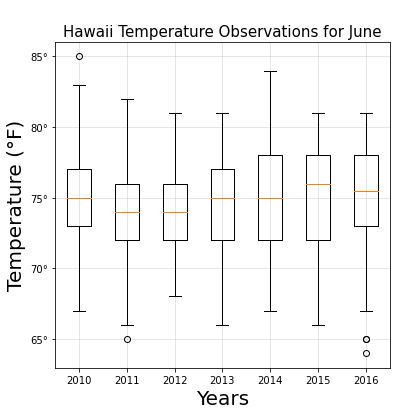

In [14]:
years = get_year_ranges(june_df)
fig, ax = plt.subplots(1, 1, figsize = (6,6))
plt.boxplot(
    [june_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    for year in years], 
    vert=True, 
    labels=years)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}°')) 
plt.title(f'\nHawaii Temperature Observations for June', fontsize = (15))
plt.xlabel('Years', fontsize = (20))
plt.ylabel('Temperature (°F)', fontsize = (20))
plt.grid(alpha = 0.4)
plt.savefig('Images/bonus_1_hawaii_june_temps.png')
plt.show()

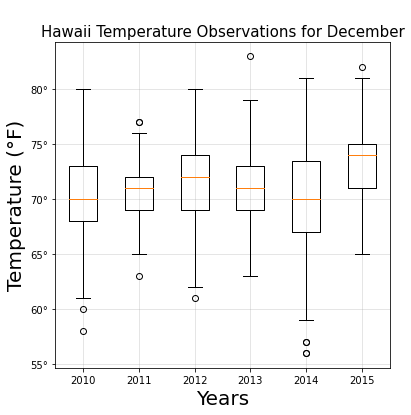

In [15]:
years = get_year_ranges(dec_df)
fig, ax = plt.subplots(1, 1, figsize = (6,6))
plt.boxplot(
    [dec_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    for year in years], 
    vert=True, 
    labels=years)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}°')) 
plt.title(f'\nHawaii Temperature Observations for December', fontsize = (15))
plt.xlabel('Years', fontsize = (20))
plt.ylabel('Temperature (°F)', fontsize = (20))
plt.grid(alpha = 0.4)
plt.savefig('Images/bonus_1_hawaii_dec_temps.png')
plt.show()

#### [Use the t-test to determine whether the difference in the means, if any, is statistically significant.](https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means)
As the t-value is so high, we can assume that there is ample evidence for a null hypothesis; likewise the p-value is so close to zero, we found no significant correlation.

#### Will you use a paired t-test, or an unpaired t-test? Why?

We are comparing the two months as unrelated, mostly because they don't share the same amount of values to pull from.